# Breast Cancer Dataset
This notebook is aims to analyze the Breast Cancer dataset provided by Utkarsh Agarwal on Kaggle.This Breast Cancer dataset has a number of characteristics that are thought to be crucial for diagnosing breast cancer.These include details on the texture of the cells, the size and form of the cell nuclei seen in the biopsy, and other morphological traits.The diagnostic that can identifies whether the tumour is benign(non-cancerous) or malignant(cancerous),is the target variable.

The dataset contain 683 instances with 11 attributes that represent the class of tumor which can be describe as below:
pid : patient id

age: age,years

meno : menopausal status (0= premenopausal, 1= postmenopausal)

size: tumor size, mm

grade: tumor grade

nodes: number of positive lymph nodes

pgr: progesterone receptors (fmol/l)

er: estrogen receptors (fmol/l)

hormon:hormonal therapy, 0= no, 1= yes

rfstime:recurrence free survival time; days to first of reccurence, death or last follow-up

status:0= alive without recurrence, 1= recurrence or death


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1.Data Preparation and Exploration

In [2]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


As we can see that the data does not have any missing value or columns as all the columns have 686 non-null entries.Therefore we do not need to remove any values or columns

In [3]:
print("Dataset row and columns:", data.shape)

Dataset row and columns: (686, 12)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


We can have brief look at the data infomation to observe if there are any missing values within the dataset 

The dataset seem to not have any missing values.

In [5]:
data.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


from this we can see the descriptive statistic of the dataset's attributes

In [6]:
data = data.drop(columns=['Unnamed: 0'])#dropping the unnmaed column as it not important

Next step is that we need to put this into boxplot so that we can spot the outliers in the dataset 

Text(0.5, 1.0, 'Boxplot for Grade')

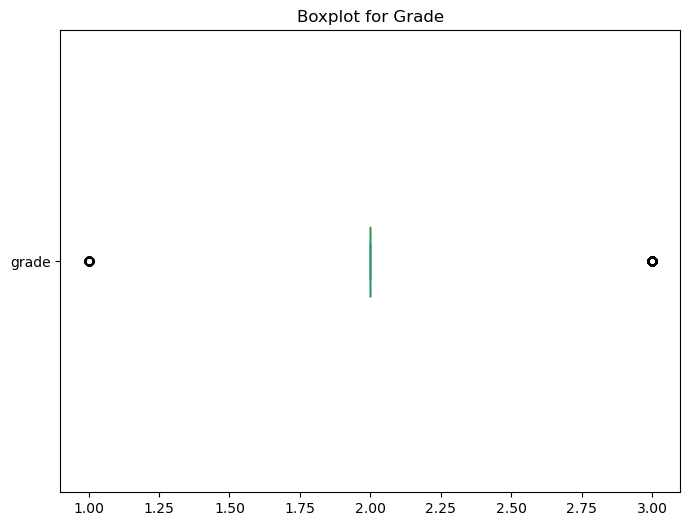

In [19]:
data['grade'].plot(kind = 'box', figsize= (8,6), vert = False);
plt.title('Boxplot for Grade')#boxplot to the the grade attribute

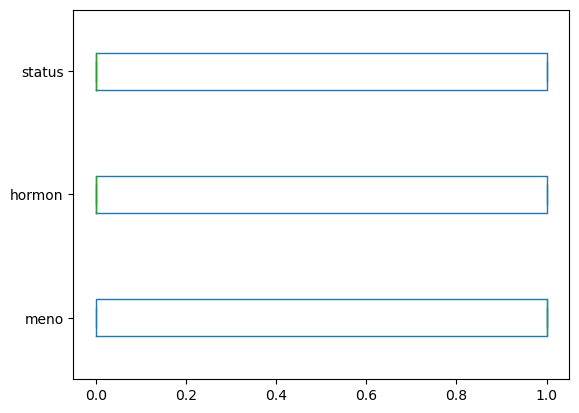

In [14]:
less_cols = data [['meno','hormon','status']]
less_cols.plot(kind = 'box',figsize= (8,6),vert = False );#boxplot that show attributes of meno,hormon and status

Text(0.5, 1.0, 'Boxplot for Age, Size, and Nodes')

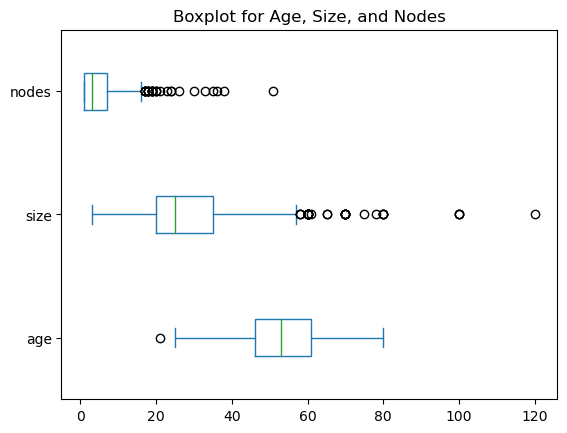

In [18]:
cols = data [['age', 'size', 'nodes',]]
cols.plot(kind = 'box', figsize= (8,6),vert = False);
plt.title('Boxplot for Age, Size, and Nodes')#boxplot that show attributes of age,size and nodes

Text(0.5, 1.0, 'Boxplot for pid, Pgr , Er and Rfstime')

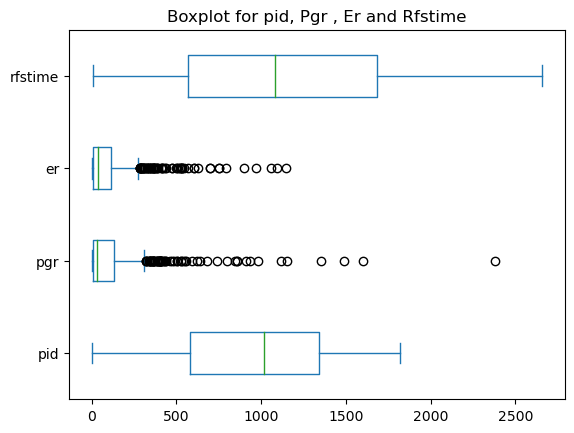

In [21]:
num_cols = data[['pid', 'pgr','er','rfstime']]
num_cols.plot(kind = 'box',figsize= (8,6), vert = False);
plt.title('Boxplot for pid, Pgr , Er and Rfstime')
#boxplot for the attricutes with high max values

With this boxplot we can see that 'pgr' and 'er' attributes have many outliers
from all the above boxplot the outlier that we can see are:
pgr > 500
er > 500
nodes > 20
size > 60
grade > 1 and < 3

Now we need to remove the outliers which is provided by the code below 

In [10]:
remove_outliers = data.loc[(data['pgr'] > 500) | (data['er'] > 500) | (data['nodes'] > 20)  | (data['size'] > 60) | ((data['grade'] > 1) & (data['grade'] < 3))].index
data = data.drop(remove_outliers )#removing the outliers using the drop method
#print the shape of data after remove of outliers 
print("Breast Cancer dataset aftter remove of outliers:", data.shape)


Breast Cancer dataset aftter remove of outliers: (218, 11)


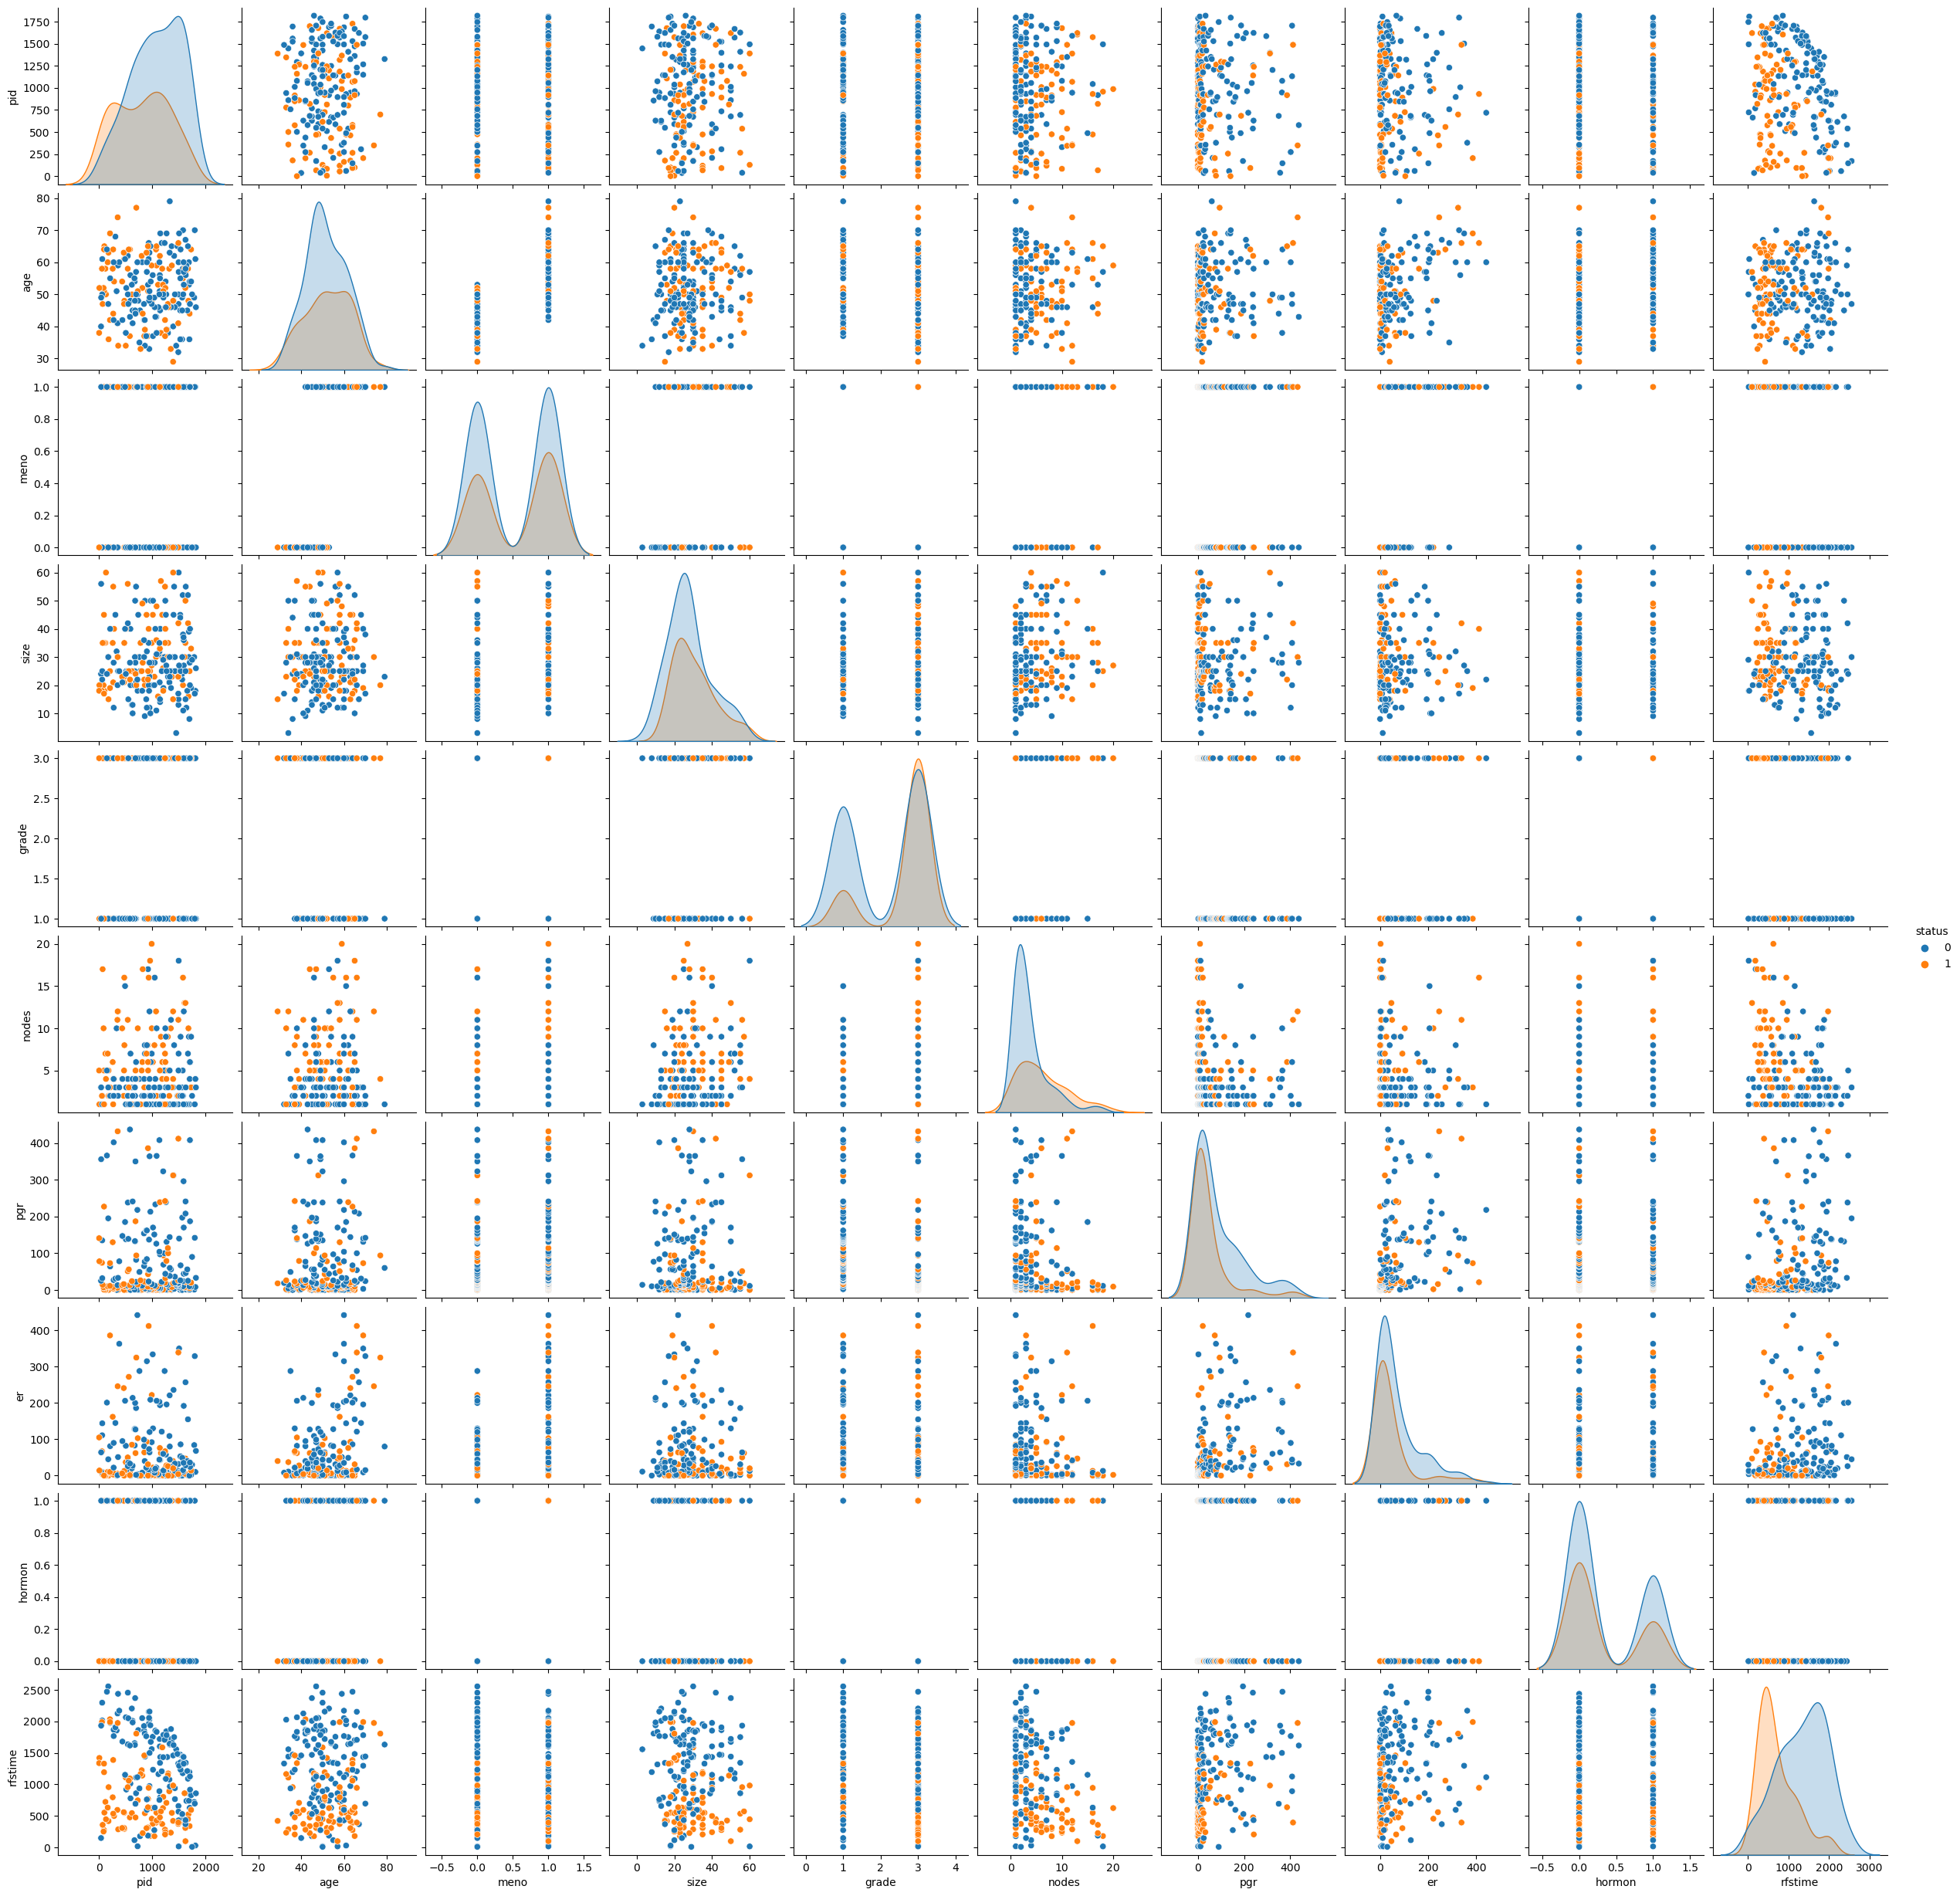

In [12]:
sns.pairplot(data, hue = 'status')
plt.show()

# 2.Model Training and Evaluation

## Linear regression
in this section we will train a model on the dataset to see if the patient has a recurrence of breast cancer  

Step one i will train a linear regression model for the dataset

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X = data.drop('status', axis = 1)
y = data['status']
#split the data int0 training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#create a losgistic regression model
model = LinearRegression() 
model.fit(X_train,y_train)

#predict the variable for training data 
y_train_pred = model.predict(X_train)

#calculate and printing the r2 and mse score for train set
r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
#print the outcome for train data
print('R2 score for train set:', r2_train)
print('MSe score for train set:' ,mse_train)

R2 score for train: 0.3823107473647791
MSe score for train: 0.14781208334463516


In [18]:
#calculate the r2 and mse
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#print the outcome for test data
print('R2 score for test set:',r2_test)
print('MSe score for test set:',mse_test)

R2 score for test set: 0.4790817807895662
MSe score for test set: 0.11704515772548484


### Model evaluation 
In the result of R2 and MSE for the train set we can see that the MSE for the test set is closer to 0 and that MSE is closer to one which indicate that our model is not as reliable or accurate.The MSE and R2 from train set it has the same indication as test set


For the next step i will do a logistic regression to class do classification for the dataset

## Logistic Regression


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [24]:
# Create a Logistic Regression model
model_log = LogisticRegression(random_state=0)
# Fit the model to your training data
model_log.fit(X_train, y_train)
# Make predictions on your test data
y_pred = model_log.predict(X_test)

k = 9
cv_score = cross_val_score(model_log,X_train, y_train, cv=k, scoring ='accuracy')
mean_score = cv_score.mean()

test_accuracy = model_log.score(X_test, y_test)
#print the outcome for the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("cross validation of mean score:", mean_score)

Accuracy: 0.7954545454545454
cross validation of mean score: 0.7812865497076023


In the test accuracy score we can see that the score is closer to 1 which indicate the model was able to somewhat predict the breast cancer status

## KNN Classifier 


For the subsequent analysis, I will employ a K-Nearest Neighbors (KNN) as this method can help us to clasify the data point in our dataset.A new data point's categorisation is determined by KNN using hyperparameters, especially the number of neighbours (k).

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Build a KNN model using the three closest neighbours
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
# Predict the desired outcome from the test data
y_train_knn = knn.predict(X_train)
test_accuracy = accuracy_score(y_test, y_test_pred)
#predict the result
print("KNN test accuracy : %.5f" % test_accuracy)

KNN test accuracy : 0.86364


From above accuracy we can see that this model is 

In [38]:
KNN = KNeighborsClassifier(n_neighbors = 3)
# Use training data to train the model
KNN.fit(X_train, y_train)
y_train_knn = KNN.predict(X_train)
# Predict the desired outcome from the train data
train_accuracy = accuracy_score(y_train, y_train_knn)
#print the result
print("KNN training accuracy : %.5f" % train_accuracy)

KNN training accuracy : 0.83333


According to the above result we can see that the data looks to suit the KNN model well. Both the training data and the test data show good performance and also demonstrating that your model does rather well at categorising fresh, new data.Which indicate that the data is good for indicating the status of reccurance for breast cancer patient